In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load dataset
data = pd.read_csv("C:/Users/rhizc/OneDrive/Desktop/POPULATION GROWTH/WPG.csv")

# check data structure
print(data.head())
print(data.info())

# descriptive statistics
print(data.describe())

   Year     Population annual_growth_% annual_growth  Density
0  1951  2,543,130,380           1.75%    43,808,223       17
1  1952  2,590,270,899           1.85%    47,140,519       17
2  1953  2,640,278,797           1.93%    50,007,898       18
3  1954  2,691,979,339           1.96%    51,700,542       18
4  1955  2,746,072,141           2.01%    54,092,802       18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             73 non-null     int64 
 1   Population       73 non-null     object
 2   annual_growth_%  73 non-null     object
 3   annual_growth    73 non-null     object
 4   Density          73 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.0+ KB
None
              Year    Density
count    73.000000  73.000000
mean   1987.000000  34.383562
std      21.217131  11.370808
min    1951.000000  17.000000
25%   

In [4]:
# data processing
# Remove commas from numeric columns
numeric_columns = ['Population', 'annual_growth']
for col in numeric_columns:
    data[col] = data[col].str.replace(',', '').astype(float)
    
# Remove percentage symbol from 'annual_growth_%' column
data['annual_growth_%'] = data['annual_growth_%'].str.rstrip('%').astype(float)

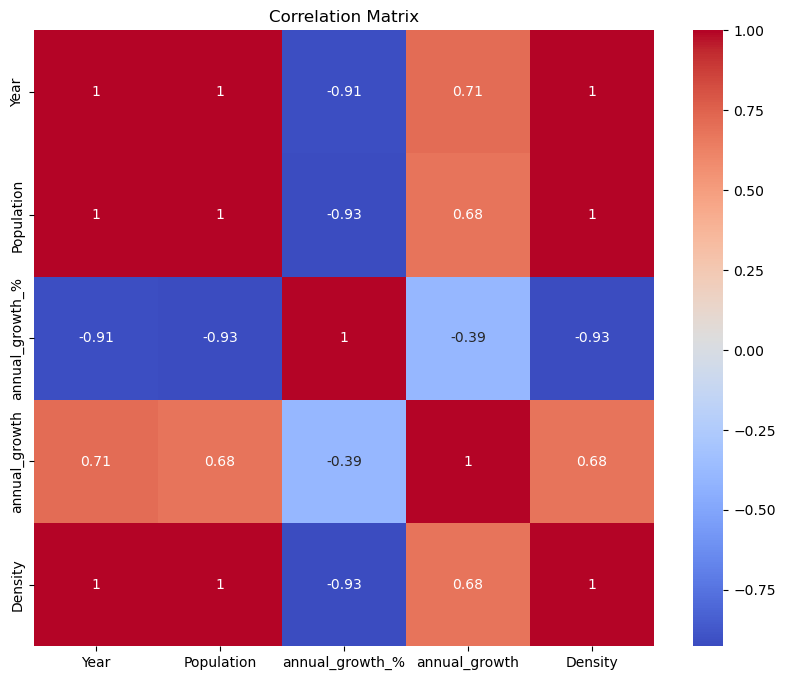

In [62]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

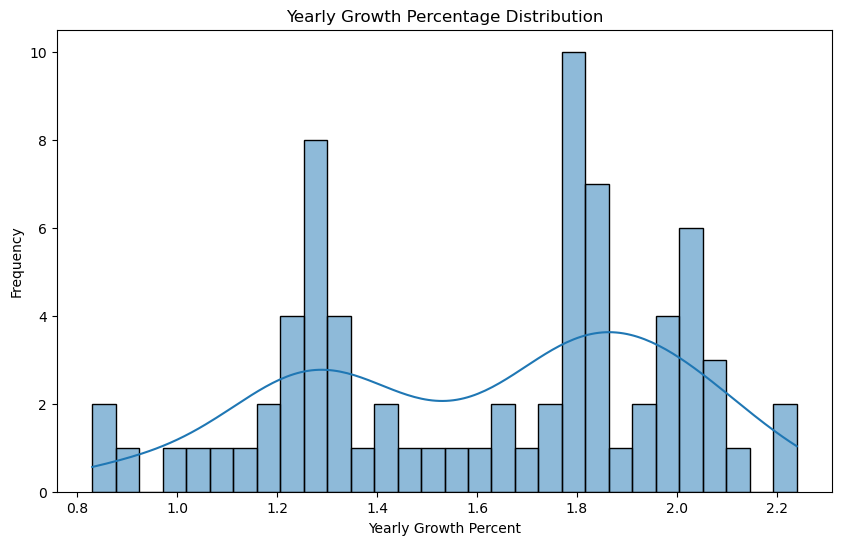

In [63]:
# visualize yearly growth percentage
plt.figure(figsize=(10, 6))
sns.histplot(data['annual_growth_%'], bins=30, kde=True)
plt.title('Yearly Growth Percentage Distribution')
plt.xlabel('Yearly Growth Percent')
plt.ylabel('Frequency')
plt.show()

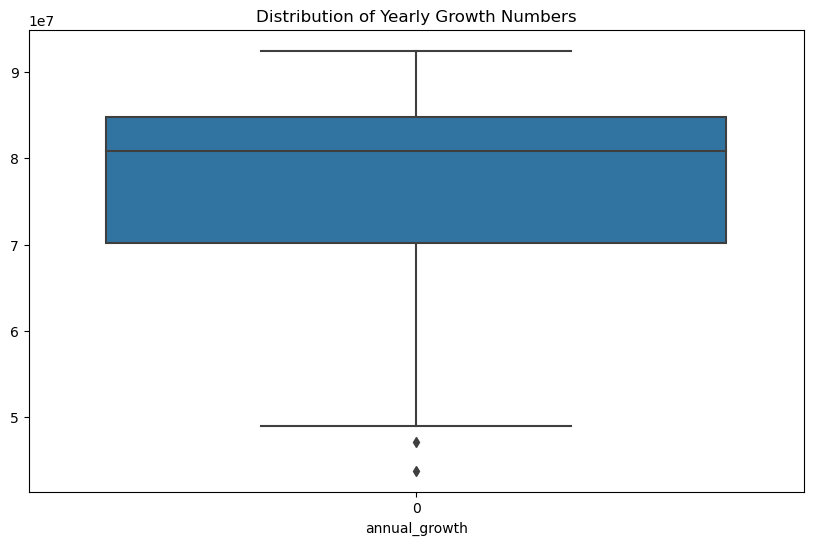

In [64]:
# Visualize growth numbers
plt.figure(figsize=(10, 6))
sns.boxplot(data['annual_growth'])
plt.title('Distribution of Yearly Growth Numbers')
plt.xlabel('annual_growth')
plt.show()

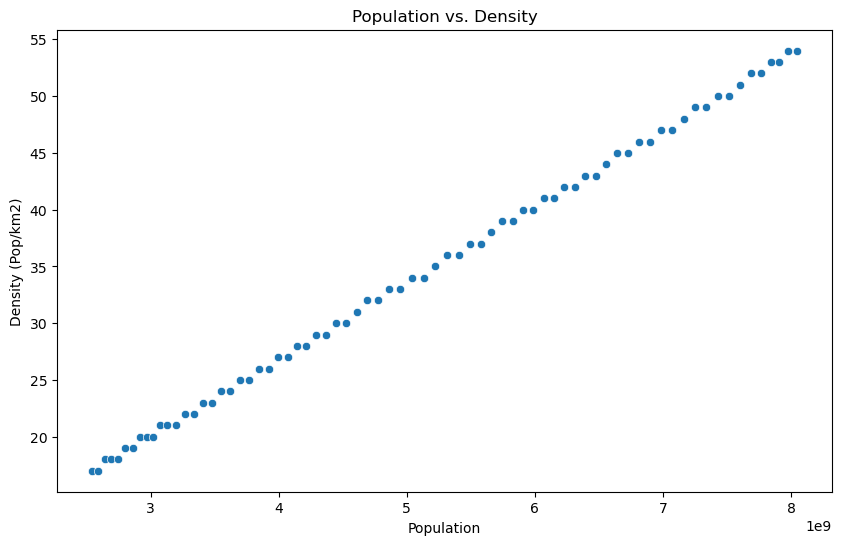

In [65]:
# Visualize population density
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Density', data=data)
plt.title('Population vs. Density')
plt.xlabel('Population')
plt.ylabel('Density (Pop/km2)')
plt.show()

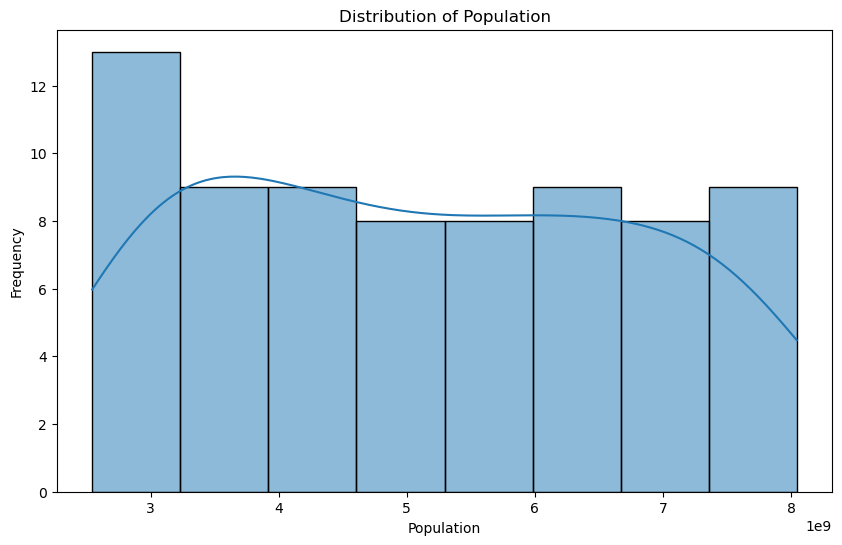

In [66]:
# Visualize population distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Population'], kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [67]:
# ANSWERS TO PROJECT ANALYSIS QUESTIONS - codes below help to provide answers to the analysis questions.

# Question 1: What is the overall trend in population growth over the years?
# Question 2: Which year had the highest population growth rate, and what was the corresponding growth number?
# Question 3: Is there a correlation between population density and growth rate?
# Question 4: What is the distribution of yearly growth percentages?
# Question 5: How does population growth vary across different years?

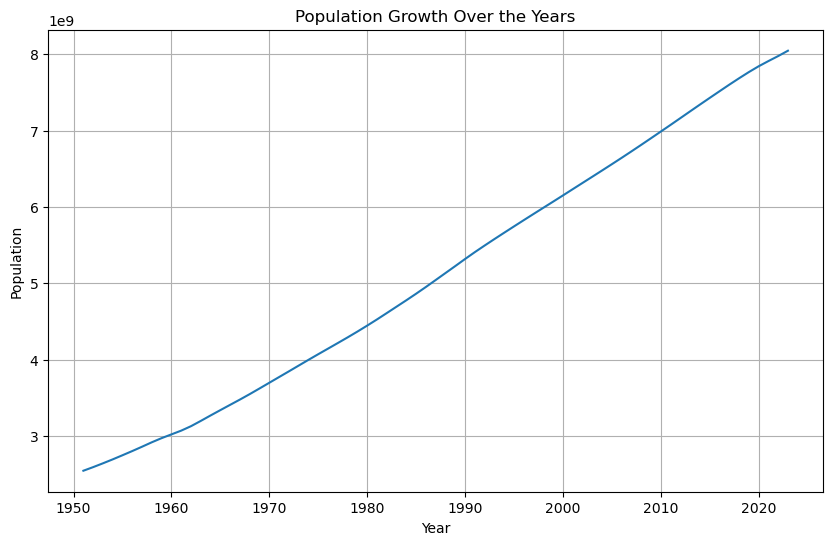

In [68]:
# Question 1: Overall trend in population growth over the years
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Population'])
plt.title('Population Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

In [69]:
# Question 2: Year with the highest population growth rate
max_growth_year = data.loc[data['annual_growth_%'].idxmax()]
print("Year with highest growth rate:", max_growth_year['Year'])
print("Corresponding growth number:", max_growth_year['annual_growth'])

Year with highest growth rate: 1964.0
Corresponding growth number: 71433091.0


In [70]:
# Question 3: Correlation between population density and growth rate
correlation = data['Density'].corr(data['annual_growth_%'])
print("Correlation coefficient:", correlation)

# A correlation coefficient of -0.926343378018833 indicates a very strong negative linear relationship between
# population density and population growth rate. 

Correlation coefficient: -0.926343378018833


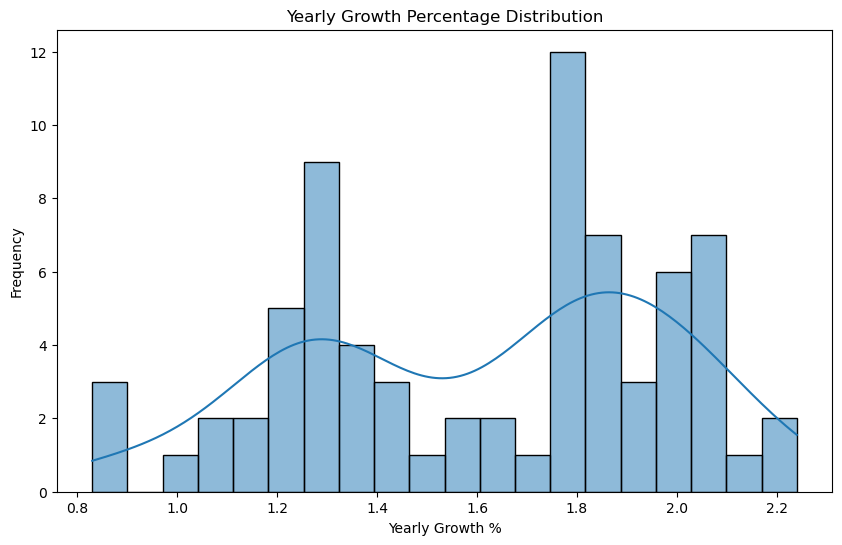

In [71]:
# Question 4: Distribution of yearly growth percentages
plt.figure(figsize=(10, 6))
sns.histplot(data['annual_growth_%'], bins=20, kde=True)
plt.title('Yearly Growth Percentage Distribution')
plt.xlabel('Yearly Growth %')
plt.ylabel('Frequency')
plt.show()

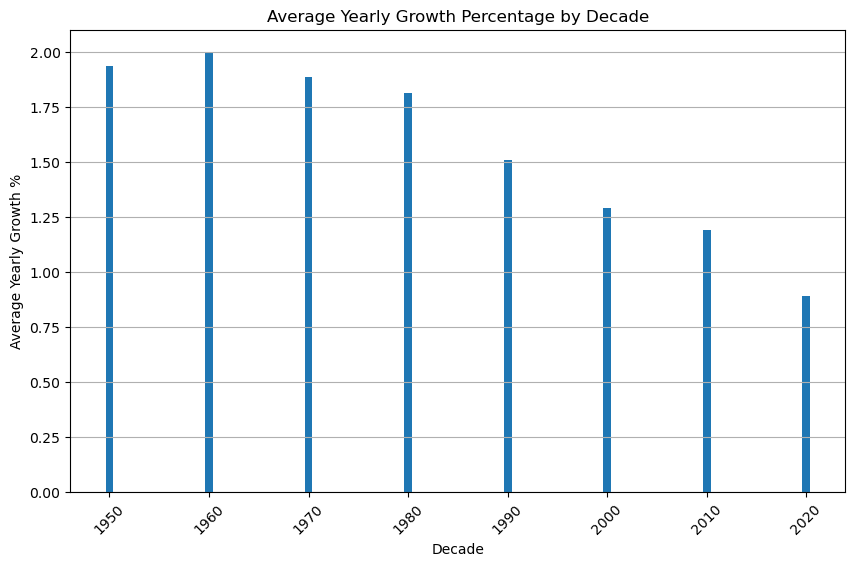

In [5]:
# Question 5: Variation in population growth across different years
avg_growth_by_decade = data.groupby(data['Year'] // 10 * 10)['annual_growth_%'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_growth_by_decade.index, avg_growth_by_decade.values)
plt.title('Average Yearly Growth Percentage by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Yearly Growth %')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\rhizc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


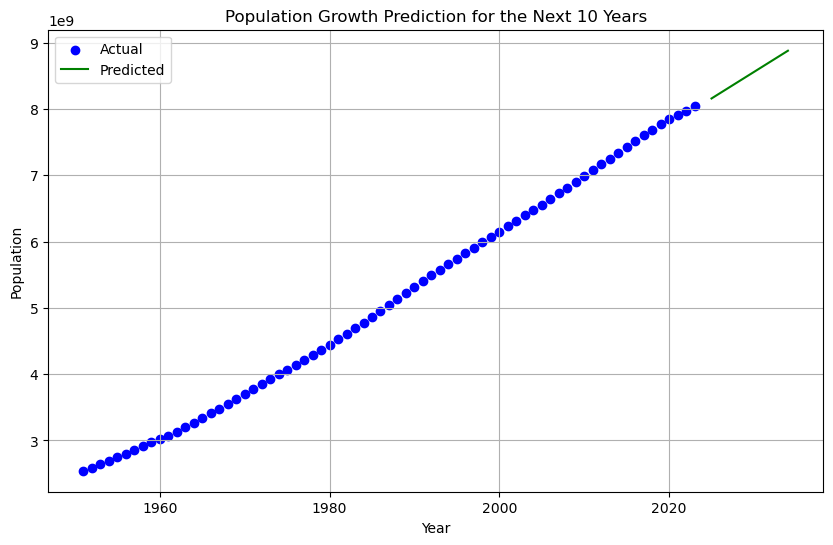

In [12]:
# predicting population growth for the next 10 years

# Create input data for the next 10 years
future_years = np.arange(2025, 2035).reshape(-1, 1)

# Predict population growth for the next 10 years
future_population = model.predict(future_years)

# Plotting the future population growth
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')  
# Plot actual data
plt.plot(future_years, future_population, color='green', label='Predicted')  
# Plot predicted data
plt.title('Population Growth Prediction for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()
